### The data set has information about features of silhouette extracted from the images of different cars

Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.



### 1. Read the dataset using function .dropna() - to avoid dealing with NAs as of now

In [1]:
%matplotlib inline


# Numerical libraries
import numpy as np   

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.metrics import r2_score

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns
import os

vehicle_df = pd.read_csv(os.getcwd() + '/vehicle.csv')
vehicle_df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [2]:
vehicle_df.shape

(846, 19)

In [3]:
vehicle_df = vehicle_df.dropna()
vehicle_df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [4]:
vehicle_df.shape

(813, 19)

### 2. Print/ Plot the dependent (categorical variable) - Class column

Since the variable is categorical, you can use value_counts function

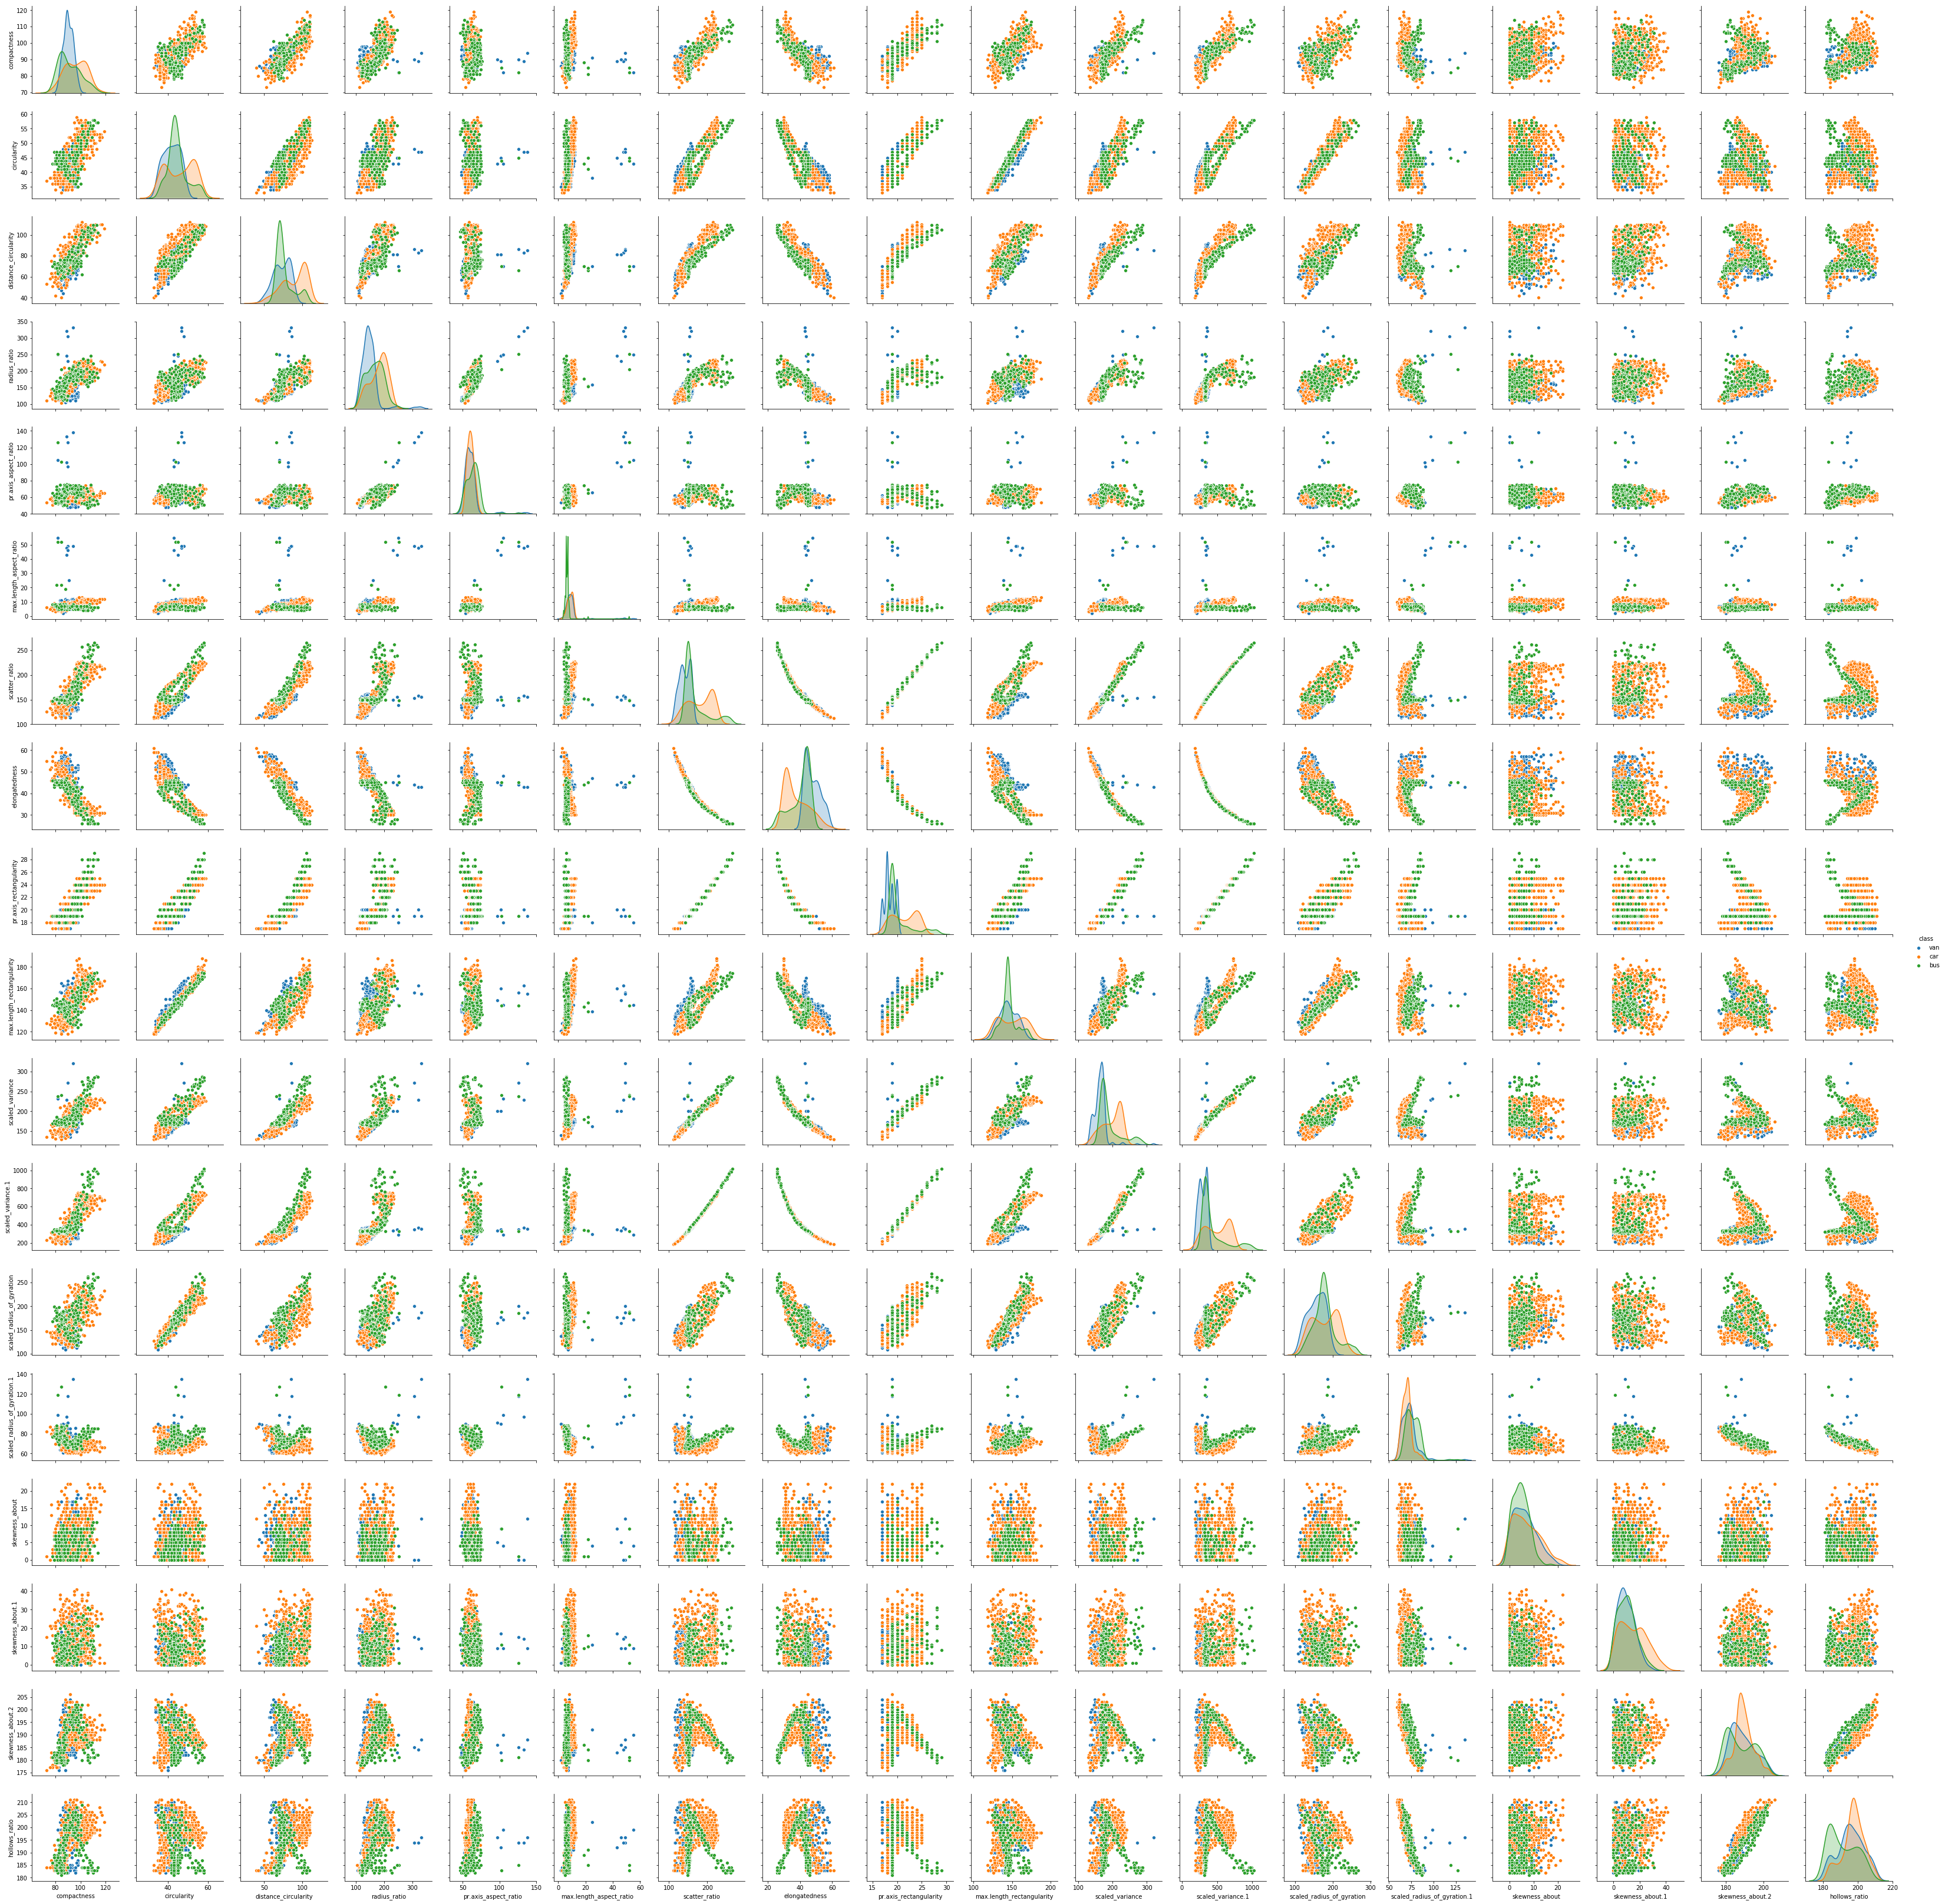

In [5]:
sns.pairplot(vehicle_df , hue='class' , diag_kind = 'kde')

### Check for any missing values in the data 

In [6]:
vehicle_df.describe()

compactness  circularity  distance_circularity  radius_ratio  \
count   813.000000   813.000000             813.00000    813.000000   
mean     93.656827    44.803198              82.04305    169.098401   
std       8.233751     6.146659              15.78307     33.615402   
min      73.000000    33.000000              40.00000    104.000000   
25%      87.000000    40.000000              70.00000    141.000000   
50%      93.000000    44.000000              79.00000    167.000000   
75%     100.000000    49.000000              98.00000    195.000000   
max     119.000000    59.000000             112.00000    333.000000   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
count            813.000000               813.000000     813.000000   
mean              61.774908                 8.599016     168.563346   
std                7.973000                 4.677174      33.082186   
min               47.000000                 2.000000     112.000000   
25%               57.000000                 7.000000     146.000000   
50%               61.000000                 8.000000     157.000000   
75%               65.000000                10.000000     198.000000   
max              138.000000                55.000000     265.000000   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
count      813.00000              813.000000                 813.000000   
mean        40.98893               20.558426                 147.891759   
std          7.80338                2.573184                  14.504648   
min         26.00000               17.000000                 118.000000   
25%         33.00000               19.000000                 137.000000   
50%         43.00000               20.000000                 146.000000   
75%         46.00000               23.000000                 159.000000   
max         61.00000               29.000000                 188.000000   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
count       813.000000         813.000000                 813.000000   
mean        188.377614         438.382534                 174.252153   
std          31.165873         175.270368                  32.332161   
min         130.000000         184.000000                 109.000000   
25%         167.000000         318.000000                 149.000000   
50%         179.000000         364.000000                 173.000000   
75%         217.000000         586.000000                 198.000000   
max         320.000000        1018.000000                 268.000000   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
count                   813.000000      813.000000        813.000000   
mean                     72.399754        6.351784         12.687577   
std                       7.475994        4.921476          8.926951   
min                      59.000000        0.000000          0.000000   
25%                      67.000000        2.000000          6.000000   
50%                      71.000000        6.000000         11.000000   
75%                      75.000000        9.000000         19.000000   
max                     135.000000       22.000000         41.000000   

       skewness_about.2  hollows_ratio  
count        813.000000     813.000000  
mean         188.979090     195.729397  
std            6.153681       7.398781  
min          176.000000     181.000000  
25%          184.000000     191.000000  
50%          189.000000     197.000000  
75%          193.000000     201.000000  
max          206.000000     211.000000

In [7]:
vehicle_df = vehicle_df.fillna(vehicle_df.median)
vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813 entries, 0 to 845
Data columns (total 19 columns):
compactness                    813 non-null int64
circularity                    813 non-null float64
distance_circularity           813 non-null float64
radius_ratio                   813 non-null float64
pr.axis_aspect_ratio           813 non-null float64
max.length_aspect_ratio        813 non-null int64
scatter_ratio                  813 non-null float64
elongatedness                  813 non-null float64
pr.axis_rectangularity         813 non-null float64
max.length_rectangularity      813 non-null int64
scaled_variance                813 non-null float64
scaled_variance.1              813 non-null float64
scaled_radius_of_gyration      813 non-null float64
scaled_radius_of_gyration.1    813 non-null float64
skewness_about                 813 non-null float64
skewness_about.1               813 non-null float64
skewness_about.2               813 non-null float64
hollows_ratio    

### 3. Standardize the data 

In [8]:
vehicle_df = vehicle_df.drop('class', axis=1)
vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813 entries, 0 to 845
Data columns (total 18 columns):
compactness                    813 non-null int64
circularity                    813 non-null float64
distance_circularity           813 non-null float64
radius_ratio                   813 non-null float64
pr.axis_aspect_ratio           813 non-null float64
max.length_aspect_ratio        813 non-null int64
scatter_ratio                  813 non-null float64
elongatedness                  813 non-null float64
pr.axis_rectangularity         813 non-null float64
max.length_rectangularity      813 non-null int64
scaled_variance                813 non-null float64
scaled_variance.1              813 non-null float64
scaled_radius_of_gyration      813 non-null float64
scaled_radius_of_gyration.1    813 non-null float64
skewness_about                 813 non-null float64
skewness_about.1               813 non-null float64
skewness_about.2               813 non-null float64
hollows_ratio    

Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we go for any clustering methods.
You can use zscore function to do this

In [9]:
from scipy.stats import zscore
vehicle_df_attr_z = vehicle_df.apply(zscore)
vehicle_df_attr_z

compactness  circularity  distance_circularity  radius_ratio  \
0       0.163231     0.520408              0.060669      0.264970   
1      -0.322874    -0.619123              0.124067     -0.836393   
2       1.256966     0.845988              1.518823      1.187734   
3      -0.079822    -0.619123             -0.002729     -0.300595   
4      -1.052030    -0.130753             -0.763506      1.068668   
6       0.406283    -0.293543             -0.573312      0.116137   
7      -0.444400    -0.293543             -1.017098     -0.360128   
8      -0.930504    -1.758654             -1.270690     -0.866160   
10     -0.930504    -1.433074             -0.763506     -0.776860   
11     -0.444400    -1.758654             -1.017098     -0.985226   
12     -0.687452     0.194828             -0.509914      0.056604   
13     -0.565926    -0.456333              0.187465     -0.747094   
14      0.041705     0.683198             -0.192923      1.009135   
15      0.284757     1.659939              1.328629      0.949602   
16     -0.565926    -1.433074             -1.968068     -1.788924   
17      0.649335    -0.619123             -0.319719      0.830535   
18      1.256966     1.497149              1.138435      0.503103   
20     -1.173556     0.357618             -0.446516     -0.479194   
21     -1.173556    -1.270284             -1.841272     -1.431725   
22      0.041705    -0.293543             -1.143894      0.116137   
23     -0.808978    -0.944703             -0.763506     -0.628027   
24      0.649335     1.334359              1.455425      1.485400   
25     -1.052030     0.032037             -0.129525     -0.449428   
26     -1.295083    -1.433074             -1.777874     -1.491258   
27      1.621544     1.497149              1.011639      1.009135   
28      1.013913     0.032037              0.187465      0.711469   
29     -1.659661    -1.107494             -1.207292     -1.193592   
30     -0.565926    -0.293543              0.187465     -0.270828   
31     -0.687452    -0.456333             -0.319719     -0.538728   
32     -0.079822    -1.595864             -1.017098     -0.449428   
..           ...          ...                   ...           ...   
816    -0.444400     0.520408              0.187465     -0.360128   
817     1.256966     1.334359              1.645620      1.038901   
818     0.163231    -0.293543              0.884843      0.979368   
819    -0.079822    -0.456333              1.011639      0.681702   
820    -0.808978    -1.107494             -0.700108     -1.372192   
821     1.256966     1.822729              0.884843      1.842599   
822     0.163231    -0.619123             -0.002729      0.026838   
823     1.378492     1.497149              1.455425      1.306800   
824     1.500018     1.659939              0.884843      0.800769   
825    -0.930504    -0.944703              0.124067     -0.598261   
826     0.163231     0.683198              0.631251      0.711469   
827     0.649335     1.985519              1.138435      0.235204   
828    -0.565926    -0.456333             -1.017098     -1.312659   
829     0.163231     0.683198             -0.002729     -0.895926   
830     0.406283    -1.270284             -0.763506      0.116137   
831     0.770861     0.357618             -0.763506      0.473336   
832     1.743070     0.683198              1.709018      1.038901   
833    -0.201348     0.194828              0.060669     -0.449428   
834    -1.416609    -1.433074             -1.968068     -1.640091   
835     2.107648     2.148309              1.455425      0.413803   
836    -0.808978     0.032037             -1.017098     -0.895926   
837     0.041705     0.194828             -0.319719     -0.002929   
838     0.163231    -0.293543             -0.383118     -0.806627   
839    -0.444400    -0.130753             -0.636710     -0.360128   
840    -0.079822    -1.758654             -1.017098     -0.866160   
841    -0.079822    -0.944703              0.314261      0.413803   
842

### K - Means Clustering

### 4. Assign a dummy array called distortion

In [10]:
from sklearn.cluster import KMeans

vehicle_df_attr = vehicle_df.loc[:, 'compactness':'hollows_ratio']

You can later use this array to plot the elbow plot

### 5. Calculating distortion - C distance

Iterating values of k from 1 to 10 fit K means model
Using c distance - Get the measure for Sum of squares error.

In [11]:
cluster_range = range( 1, 10)   
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(vehicle_df_attr)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

num_clusters  cluster_errors
0             1    2.917617e+07
1             2    6.905477e+06
2             3    4.610991e+06
3             4    3.333252e+06
4             5    2.288297e+06
5             6    1.823916e+06
6             7    1.652600e+06
7             8    1.465964e+06
8             9    1.321039e+06

### 6. Plotting Elbow/ Scree Plot

Use Matplotlib to plot the scree plot - Note: Scree plot plots distortion vs the no of clusters

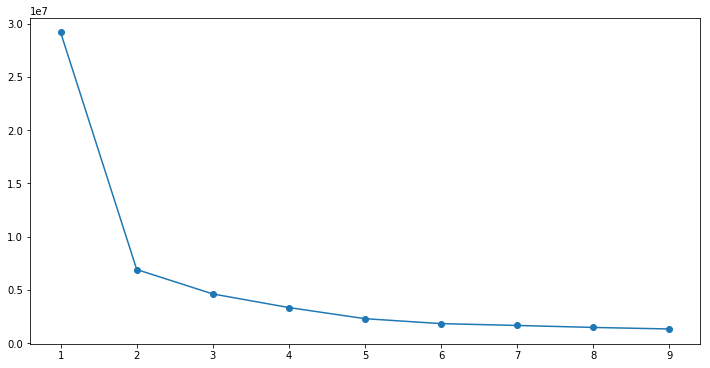

In [12]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

### Find out the optimal value of K

In [13]:
print("optimal value of k is 2")

optimal value of k is 2


### Using optimal value of K - Cluster the data. 
Note: Since the data has more than 2 dimension we cannot visualize the data. As an alternative, we can observe the centroids and note how they are distributed across different dimensions

In [14]:
cluster = KMeans( n_clusters = 2, random_state = 2354 )
cluster.fit(vehicle_df_attr_z)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=2354, tol=0.0001, verbose=0)

You can use kmeans.cluster_centers_ function to pull the centroid information from the instance

In [15]:
centroids = cluster.cluster_centers_
centroids

array([[-0.56180643, -0.58110816, -0.60387639, -0.5326733 , -0.12159511,
        -0.16400847, -0.63711793,  0.60754663, -0.63896831, -0.5379239 ,
        -0.61246602, -0.63980526, -0.53356985,  0.04202611, -0.07458642,
        -0.13153147, -0.03702134, -0.1233491 ],
       [ 1.05786955,  1.0942143 ,  1.13708639,  1.00301249,  0.228961  ,
         0.30882445,  1.19967951, -1.14399738,  1.20316373,  1.01289926,
         1.15326048,  1.20473969,  1.00470068, -0.07913426,  0.14044464,
         0.24767096,  0.0697104 ,  0.23226373]])

### 7. Store the centroids in a dataframe with column names from the original dataset given 

Hint: Use pd.Dataframe function 

In [16]:
centroid_df = pd.DataFrame(centroids, columns = list(vehicle_df_attr_z) )
centroid_df

compactness  circularity  distance_circularity  radius_ratio  \
0    -0.561806    -0.581108             -0.603876     -0.532673   
1     1.057870     1.094214              1.137086      1.003012   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0             -0.121595                -0.164008      -0.637118   
1              0.228961                 0.308824       1.199680   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       0.607547               -0.638968                  -0.537924   
1      -1.143997                1.203164                   1.012899   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0        -0.612466          -0.639805                  -0.533570   
1         1.153260           1.204740                   1.004701   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                     0.042026       -0.074586         -0.131531   
1                    -0.079134        0.140445          0.247671   

   skewness_about.2  hollows_ratio  
0         -0.037021      -0.123349  
1          0.069710       0.232264

### Use kmeans.labels_ function to print out the labels of the classes

In [17]:
labels = clusters.labels_
labels

array([6, 3, 7, 3, 8, 6, 3, 1, 1, 1, 6, 6, 0, 7, 1, 0, 2, 6, 1, 6, 3, 7,
       3, 1, 2, 5, 3, 6, 3, 3, 7, 0, 3, 8, 2, 3, 7, 1, 6, 0, 2, 6, 1, 3,
       6, 6, 3, 6, 2, 6, 4, 1, 5, 6, 7, 1, 5, 1, 1, 3, 5, 3, 2, 3, 5, 2,
       0, 1, 3, 7, 0, 3, 6, 2, 1, 3, 6, 4, 3, 1, 0, 1, 2, 0, 7, 6, 3, 2,
       3, 3, 7, 3, 8, 6, 1, 1, 7, 7, 3, 3, 5, 3, 6, 3, 1, 6, 6, 7, 2, 0,
       1, 6, 3, 1, 3, 6, 3, 3, 6, 7, 7, 3, 5, 1, 2, 8, 6, 1, 1, 3, 6, 2,
       3, 0, 2, 6, 3, 6, 1, 5, 5, 3, 7, 3, 4, 3, 1, 3, 1, 7, 0, 1, 2, 2,
       6, 2, 3, 1, 2, 4, 3, 2, 6, 6, 0, 6, 1, 7, 1, 3, 1, 7, 0, 0, 6, 7,
       6, 5, 3, 4, 6, 3, 2, 6, 3, 3, 6, 6, 2, 2, 1, 3, 6, 3, 2, 0, 1, 6,
       2, 1, 3, 2, 3, 1, 2, 6, 3, 1, 3, 2, 1, 7, 3, 1, 1, 3, 7, 1, 6, 0,
       2, 6, 6, 6, 3, 2, 6, 3, 6, 0, 2, 1, 2, 6, 3, 6, 2, 6, 3, 7, 2, 1,
       0, 1, 1, 5, 3, 0, 1, 1, 3, 0, 3, 4, 3, 3, 1, 2, 6, 5, 3, 3, 2, 3,
       3, 7, 1, 1, 8, 6, 1, 4, 6, 7, 1, 0, 0, 2, 6, 6, 1, 3, 3, 7, 2, 7,
       5, 6, 3, 7, 3, 1, 1, 5, 1, 2, 4, 3, 5, 0, 3,

In [18]:
prediction=cluster.predict(vehicle_df_attr_z)
vehicle_df_attr_z["GROUP"] = prediction

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a286b86a0>,
      dtype=object)

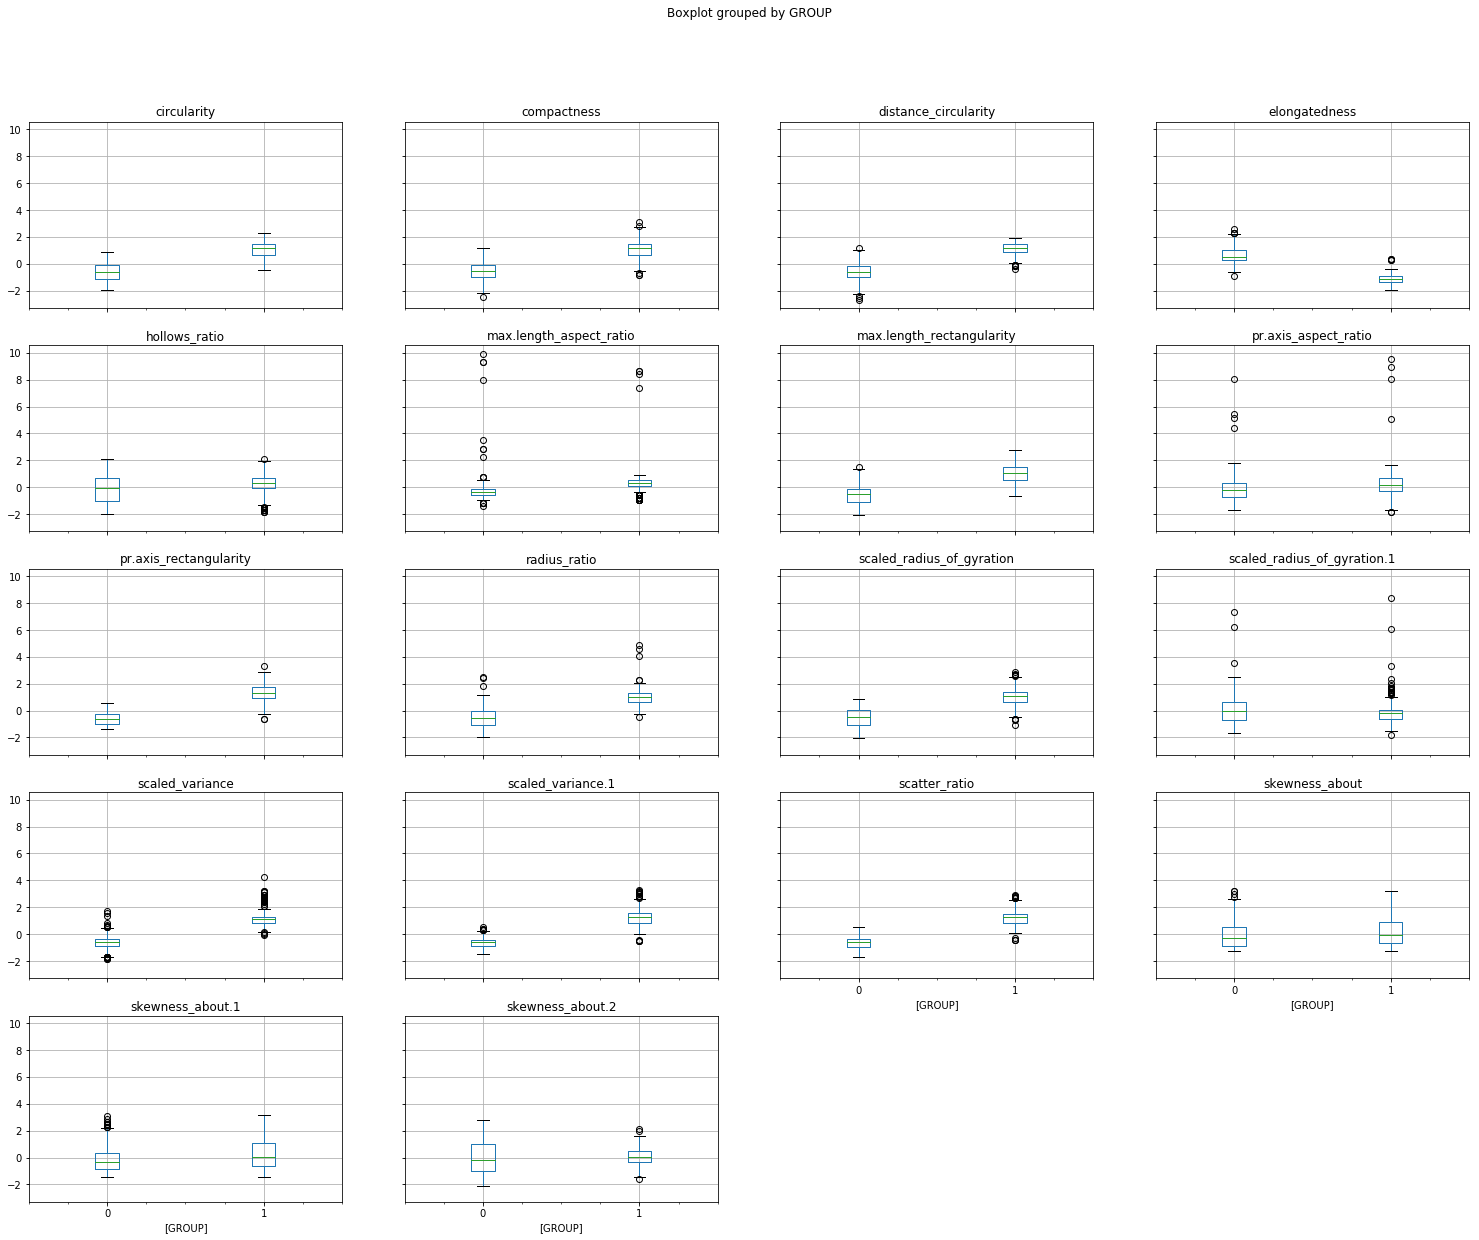

In [19]:
import matplotlib.pylab as plt

vehicle_df_attr_z.boxplot(by = 'GROUP', figsize=(25, 20))

## Hierarchical Clustering 

### 8. Variable creation

For Hierarchical clustering, we will create datasets using multivariate normal distribution to visually observe how the clusters are formed at the end

### 9. Combine all three arrays a,b,c into a dataframe

In [35]:
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

In [36]:
df = pd.DataFrame(np.concatenate((a, b, c), axis=0))
df

0          1
0    12.372772  -2.762475
1    10.085137   1.819215
2    10.121900  -0.399476
3     9.408782  -1.600988
4    10.289440  -1.913981
5     7.688694  -1.193788
6     9.373529  -2.128333
7     8.377364  -1.782613
8     8.177434  -3.203033
9     9.274617  -2.377806
10   10.768034   2.347383
11    9.070272  -1.460813
12   11.709339  -0.274776
13   10.642640  -1.737850
14    9.926954   3.030033
15    7.968453  -2.564310
16   10.533559   2.881812
17    8.828150  -1.688895
18   10.088327   0.289312
19    8.471650  -3.593883
20    9.544268  -0.624535
21    9.283231  -1.055026
22    9.849982  -0.675429
23    7.892990  -1.199623
24   10.590911   3.442310
25    9.782721   2.387463
26    7.089412  -0.914780
27   12.011539   2.771041
28   10.975744   0.555913
29   10.264142  -3.491855
..         ...        ...
220  10.047299  19.670138
221   7.734923  20.387927
222   8.312413  16.814147
223   9.080319  19.093098
224   8.442930  19.455467
225  12.349106  20.440649
226   8.350600  14.204077
227  11.727149  21.151825
228  13.799558  19.321277
229   9.969361  19.532052
230  10.118604  19.441431
231  12.561974  20.642340
232   9.300145  17.826899
233  12.120045  18.156089
234   8.712701  17.840902
235  10.397926  18.722955
236  10.755029  19.688048
237  11.975501  19.871390
238   7.462220  17.153379
239   8.978395  23.128466
240   8.669859  19.773843
241  10.676709  19.094748
242   8.627859  19.497208
243   9.315243  18.115658
244   6.735117  15.319273
245  10.773714  19.562905
246   9.349333  22.358363
247  10.180463  20.866446
248  10.347393  21.608901
249   6.594871  18.065867

[250 rows x 2 columns]

### 10. Use scatter matrix to print all the 3 distributions

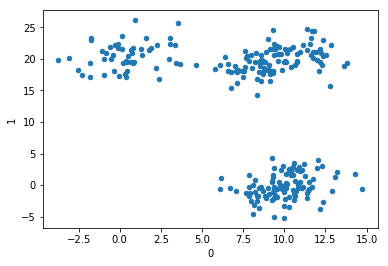

In [37]:
#sns.pairplot(df  , diag_kind = 'kde')
df.plot.scatter(0,1)

### 11. Find out the linkage matrix

In [38]:
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist

Use ward as linkage metric and distance as Eucledian

In [39]:
model = AgglomerativeClustering(n_clusters=15, affinity='euclidean',  linkage='ward')

In [40]:
model.fit(df)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=15,
            pooling_func='deprecated')

### 12. Plot the dendrogram for the consolidated dataframe

In [41]:
Z = linkage(df, 'ward')
c, coph_dists = cophenet(Z , pdist(df))

c

0.9548289526831978

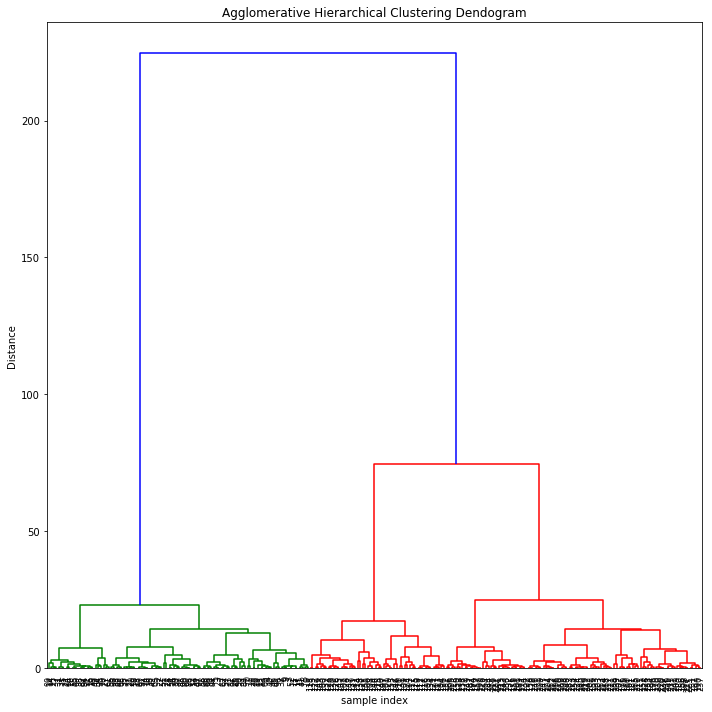

In [42]:
plt.figure(figsize=(10, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 80, leaf_font_size=8. )
plt.tight_layout()

### 13. Recreate the dendrogram for last 12 merged clusters 

Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram 

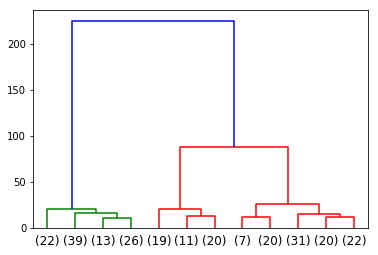

In [28]:
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
)
plt.show()

### 14. From the truncated dendrogram, find out the optimal distance between clusters which u want to use an input for clustering data

In [29]:
threshold = 50

### 15. Using this distance measure and fcluster function to cluster the data into 3 different groups

In [30]:
from scipy.cluster.hierarchy import ward, fcluster

In [31]:
Z = ward(pdist(df)) # 3 groups is threshold selected cuts 3 line or creates 3 clusters

In [32]:
f = fcluster(Z, t=50, criterion='distance')

### Use matplotlib to visually observe the clusters in 2D space 

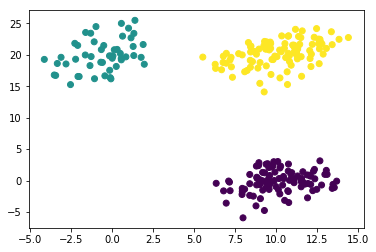

In [33]:
plt.scatter(df[0], df[1], c=f)